## Regression

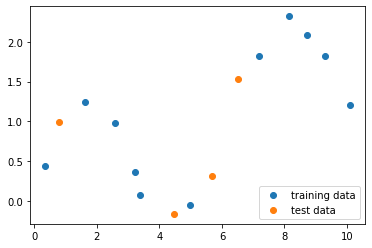

In [3]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#np.random.seed(0) makes the random numbers predictable With the seed reset (every time), the same set of numbers will appear every time.
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);
# print(X_train)

### Question 1.1
Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees 2, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [4]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    #Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
    from sklearn.preprocessing import PolynomialFeatures
    degrees = [2, 3, 6, 9]
    result = np.empty((4, 100))
    for i, degree in enumerate(degrees):
      poly = PolynomialFeatures(degree)
      X_poly = poly.fit_transform(X_train.reshape(11,1))
      reg_model = LinearRegression()
      reg_model.fit(X_poly, y_train)
      X_predict = poly.fit_transform(np.linspace(0, 10, 100).reshape(100,1))
      y_predict =reg_model.predict(X_predict)
      result[i] = y_predict
    return result
answer_one()

array([[ 5.38844184e-01,  5.38465542e-01,  5.38399013e-01,
         5.38644598e-01,  5.39202297e-01,  5.40072109e-01,
         5.41254034e-01,  5.42748073e-01,  5.44554226e-01,
         5.46672492e-01,  5.49102871e-01,  5.51845365e-01,
         5.54899971e-01,  5.58266691e-01,  5.61945525e-01,
         5.65936473e-01,  5.70239533e-01,  5.74854708e-01,
         5.79781996e-01,  5.85021397e-01,  5.90572912e-01,
         5.96436541e-01,  6.02612283e-01,  6.09100138e-01,
         6.15900107e-01,  6.23012190e-01,  6.30436386e-01,
         6.38172696e-01,  6.46221119e-01,  6.54581656e-01,
         6.63254307e-01,  6.72239070e-01,  6.81535948e-01,
         6.91144939e-01,  7.01066043e-01,  7.11299261e-01,
         7.21844593e-01,  7.32702038e-01,  7.43871597e-01,
         7.55353269e-01,  7.67147055e-01,  7.79252954e-01,
         7.91670967e-01,  8.04401093e-01,  8.17443333e-01,
         8.30797686e-01,  8.44464153e-01,  8.58442734e-01,
         8.72733428e-01,  8.87336235e-01,  9.02251156e-0

### Fitted model plot

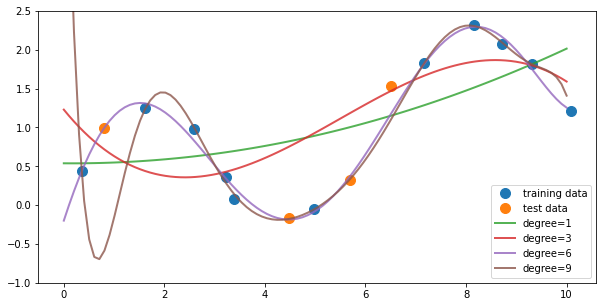

In [5]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above in 2 lines.

### Quick note on $R^2$-score:
A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^2$-score of 0.0.

### Question 2
Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 2 through 9. For each model compute the $R^2$ regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [6]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score
    degrees = np.arange(2,10,1)
    result = []
    train_data_reg_score = []
    test_data_reg_score = []
    for i, degree in enumerate(degrees):
      poly = PolynomialFeatures(degree)
      reg_model = LinearRegression()
      X__train_poly = poly.fit_transform(X_train.reshape(11,1))
      X__test_poly = poly.fit_transform(X_test.reshape(4,1))
      reg_model.fit(X__train_poly, y_train)
      train_data_reg_score.append(reg_model.score(X__train_poly, y_train))
      test_data_reg_score.append(reg_model.score(X__test_poly, y_test)) 
    result.append(train_data_reg_score)
    result.append(test_data_reg_score)
    return tuple(result)
answer_two()

([0.45109980444082465,
  0.5871995368779845,
  0.9194194471769309,
  0.9757864143068185,
  0.9901823324795106,
  0.9935250927840563,
  0.9963754538775583,
  0.9980370625641342],
 [-0.06856984149915935,
  0.00533105294577807,
  0.7300494281868395,
  0.8770830091626403,
  0.9214093981548739,
  0.9202150412199214,
  0.6324794184645642,
  -0.6452529398860267])

### Question 3
Plot $R^2$ scores at degrees from 2 to 9.

Based on the $R^2$ scores (degree levels 2 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

In [7]:
def answer_three():
    r2_scores = answer_two()
    df = pd.DataFrame({'training_score':r2_scores[0], 'test_score':r2_scores[1]})
    df['degrees'] = [2, 3, 4, 5, 6, 7, 8, 9]
    df['diff'] = df['training_score'] - df['test_score']
    #sorting in ascending order 
    df = df.sort_values(by = ['diff'])
    #the first element will have the minimum difference between train score 7 test score so it will be a good generalization
    good_gen = df.iloc[0]['degrees']
    df = df.sort_values(by = ['diff'], ascending = False)
    #the maximum difference means great score on train data but very small score on test data
    overfitting = df.iloc[0]['degrees']
    #sorting in ascending order based on training values
    df = df.sort_values(by = ['training_score'])
    #the first element is the one with least score on train data
    underfitting = df.iloc[0]['degrees']
    return [good_gen, overfitting, underfitting]
    # return good_gen
answer_three()

[6.0, 9.0, 2.0]

### Question 4

Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

**Comment on the results**

In [8]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression
    from sklearn.metrics import r2_score
    poly = PolynomialFeatures(12)
    X_poly = poly.fit_transform(X_train.reshape(11,1))
    non_reg_reg_model = LinearRegression()
    reg_lasso_reg_model = Lasso(alpha=0.01, max_iter=10000)
    non_reg_reg_model.fit(X_poly, y_train)
    reg_lasso_reg_model.fit(X_poly, y_train)
    lasso_score = reg_lasso_reg_model.score(poly.fit_transform(X_test.reshape(4,1)), y_test)
    reg_score = non_reg_reg_model.score(poly.fit_transform(X_test.reshape(4,1)), y_test)
    return (reg_score, lasso_score)
answer_four()

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(


(-4.3119702772021435, 0.8406625614750521)

### Question 5
Calculate total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

Then compare your results with scikit-learn implementation of mean square error.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def mse(y_true, y_pred):
    error = np.square(np.subtract(y_true, y_pred)).mean()
    return error
reg_model = LinearRegression()
reg_model.fit(X_train.reshape(11,1), y_train)
y_pred = reg_model.predict(X_test.reshape(4, 1))
print(mse(y_test, y_pred), mean_squared_error(y_test, y_pred))

0.607140956853339 0.607140956853339


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type 


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b 
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k 
        $$
    * Then for $b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)} 
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [10]:
from matplotlib.axis import YTick
import numpy as np

# Linear Regression

class LinearRegression() :
    
    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :
        """
        This function initializes the object instance with arguments learning_rate, number of iterations, and whether to use linear or ridge or lasso
        reg_paramter is lambda for regularized regression"""

        self.learning_rate = learning_rate
        
        self.iterations = iterations
        
        self.type = type

        self.lam = reg_parameter
        
    def fit( self, X, Y ) :
        self.m, self.n = X.shape[0], X.shape[1]
        
        # weight initialization, initialize w to random numbers from a uniform distribution over [0,1(
        self.W = np.random.uniform(0.0, 1.0, size = 1)
        # intialize b to 0

        self.b = 0

        self.X = X

        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self
    
    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients
        if self.type == 'linear':
            dW = -(2/self.n) * sum(self.X * (self.Y - Y_pred))
            
            db = -(2/self.n) * sum(self.Y - Y_pred)
            
        elif self.type == 'ridge':
            dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +  ( 2 * self.lam* self.W ) ) / self.m     
            db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        else:
            dW = ( - ( 2 * ( self.X.T ).dot( self.Y - Y_pred ) ) +               
               ( 2 * self.lam * self.W ) ) / self.m 

            db =  - 2 * np.sum( self.Y - Y_pred ) / self.m

        # update weights
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db

        # you don't need to return w and b
        return self

    def predict( self, X ) :
        if self.type == 'linear':
            y_pred = X.dot( self.W ) + self.b
        elif self.type == 'ridge':
            y_pred = X.dot( self.W ) + self.b
            
        else:
            y_pred = X.dot( self.W ) + self.b
        return y_pred

### Part 2
Run the following cells to download fmnist dataset which will be used for the rest of the assignment.

In [11]:
!pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 KB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=28a7b7ca5d5645b72b4fd630585cfe8e158c18686ae846a6c5a71872ffc8512c
  Stored in directory: /root/.cache/pip/wheels/08/82/8b/5c514221984e88c059b94e36a71d4722e590acaae04deab22e
Successfully built liac-arff


In [12]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute); 
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

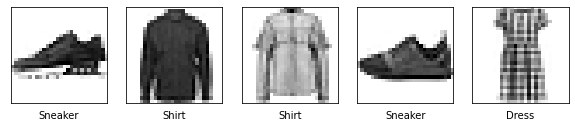

In [13]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

### Question 7
First, we'll try the default Logistic Regression and k-Nearest Neighbors as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using cross_validation.

Implement the following `evaluate_learners` function which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You must use `cross_validate` function.

In [14]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.1, random_state =0)
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
log_reg.fit(Xs, ys)
knn.fit(Xs, ys)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [15]:
def evaluate_learners(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data. 
    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:     
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    from sklearn.model_selection import cross_val_score
    train_score = []
    test_scores = []
    Xs, x, ys, y = train_test_split(X,y, stratify=y, train_size=0.1, random_state =0)
    for classifier in classifiers:
      classifier_train_scores = cross_val_score(classifier, Xs, ys, cv=5)
      train_score.append(classifier_train_scores)
      classifier_test_scores = cross_val_score(classifier, x, y, cv=5)
      test_scores.append(classifier_test_scores)
    return train_score,test_scores
# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.


With this small sample of our data we can now train and evaluate the two classifiers.

In [16]:
classifiers = [LogisticRegression(), KNeighborsClassifier()]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Print train scores and test scores.

In [17]:
print(train_scores, test_scores)

[array([0.72142857, 0.77857143, 0.74285714, 0.75      , 0.75      ]), array([0.69285714, 0.74285714, 0.68571429, 0.73571429, 0.68571429])] [array([0.8031746 , 0.82777778, 0.81587302, 0.83253968, 0.81349206]), array([0.8047619 , 0.80634921, 0.79444444, 0.82142857, 0.80555556])]


### Regularization
We will now tune these algorithm's main regularization hyperparameter: the regularization parameter in logistic regression (alpha), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for n_neighbors between 1 and 50. Alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

### Question 8
In the following cells we vary the regularization parameters in the range given above and, for each classifier, we create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, 2 plots are produced, one for each classifier. We use 5-fold cross validation for all scores, but only plot the means.


In [18]:
from sklearn.model_selection import GridSearchCV
param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 60, num=12, dtype=int)[1:]}
grids = [param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=5, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

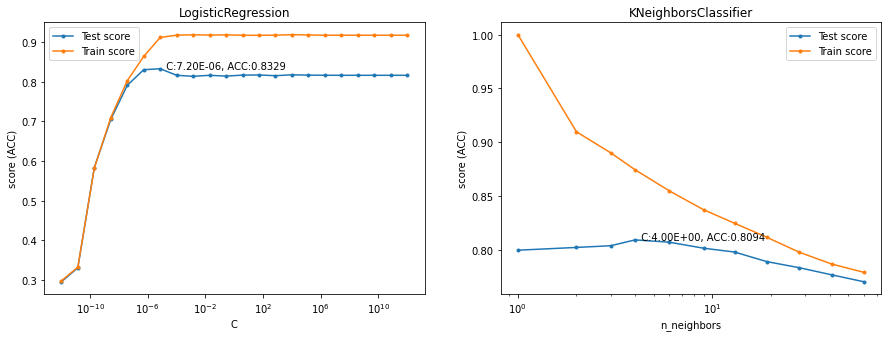

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)

Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

## Interpreting misclassifications
We train a logistic regression model on the data to look at the confusion matrix

In [24]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

In [25]:
# model implementation:
model = LogisticRegression(C=1e-7).fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Question 9
A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results. Draw the complete confusion matrix for the true and predicted test data.

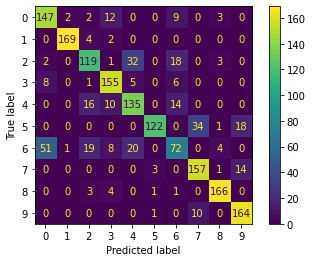

In [26]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
# fig, ax = plt.subplots()
# im = ax.imshow(confusion_matrix)
# ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
# ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
# ax.set_yticklabels(list(fmnist_classes.values()))
# ax.set_ylabel('True')
# ax.set_xlabel('Predicted')
# for i in range(100):
#     ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Interpreting model parameters
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images.

### Question 10
Train a Logistic Regression model using its tuned hyperparameter from gridsearch used above.
When in doubt, use `C=1e-7` for LogReg.
Pass the trained model to the provided plotting function. Interpret the results in detail. 
Why do you get multiple plots per model? What do the features represent in your data. 
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes?

In [27]:
# Plots the coefficients of the given model as 28x28 heatmaps. 
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())

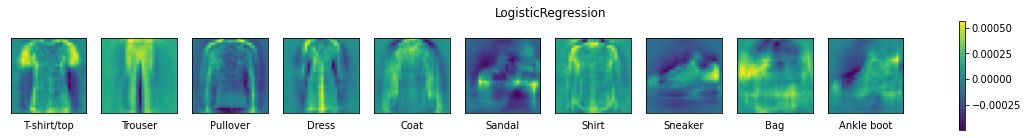

In [29]:
##### Call on the function plot_coefficients using your trained model
plot_coefficients(model)

**Hint** that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

**Answer:**
linear models solve classification problems with one vs all approach it will build model for eachh prediction

### Question 11
Finally, out of curiosity, let's see the result of underfitting and overfitting on the learned coefficients:
Repeat the previous exercise, only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. 

In the cell below replace the ####### with your trained models with different alphas.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


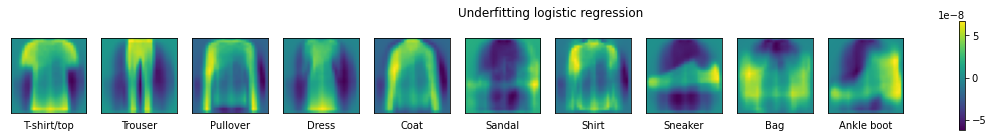

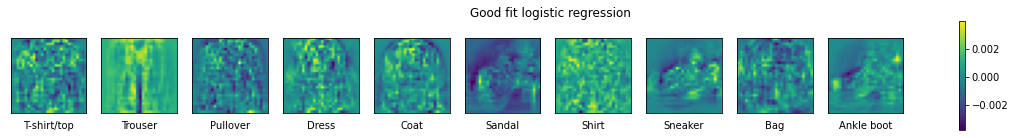

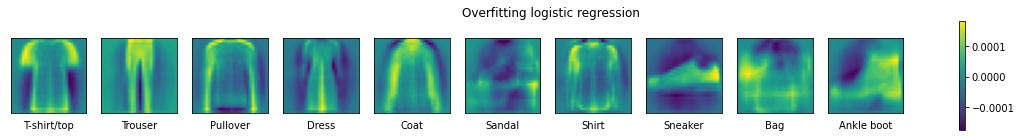

In [30]:
plot_coefficients(LogisticRegression(C=1e-12).fit(X_train, y_train),"Underfitting logistic regression")
plot_coefficients(LogisticRegression(C=1e-5).fit(X_train, y_train),"Good fit logistic regression")
plot_coefficients(LogisticRegression(C=1e-8).fit(X_train, y_train),"Overfitting logistic regression")

Interpret and explain the results.
* **Answer:**
in case we underfit the model it focuses more on the shape of things but if we overfit it it pays attention to unwanted details(noise & even backgroung) pixels